In [445]:
import requests
import re

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract and clean data

In [446]:
def get_content(subject):
    url = "https://en.wikipedia.org/w/api.php"
    params = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "titles": subject,
        "explaintext": True,
    }

    response = requests.get(url, params=params)

    return response.json()

In [447]:
def merge_contents(data):
    page_id = list(data["query"]["pages"].keys())[0]
    page_content = data["query"]["pages"][page_id]["extract"]
    return page_content

In [448]:
subject = "Ozone_layer"
data = get_content(subject)
print(data)

{'batchcomplete': '', 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface

In [449]:
merge_content = merge_contents(data)
print(merge_content)

The ozone layer or ozone shield is a region of Earth's stratosphere that absorbs most of the Sun's ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth's atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that there was 

# Tokenize and make all lower case

In [450]:
def tokenize(merge_content):
    delimiters = [
        "\n",
        " ",
        "\t",
        ":",
        ";",
        ",",
        ".",
        "!",
        "?",
        "(",
        ")",
        "{",
        "}",
        "[",
        "]",
        '"',
        "'",
        "/",
        "|",
        "`",
        "~",
        "—",
        ">",
        "<",
        "#",
        "@",
        "$",
        "%",
        "^",
        "&",
        "*",
        "+",
        "_",
        "=",
        "≈",
    ]

    pattern = "|".join(
        re.escape(delimiter) for delimiter in delimiters
    )  # re.escape treats special chars as actual chars and not regex patterns

    tokens = list(filter(None, re.split(pattern, merge_content)))
    tokens = [t for t in tokens if t != "s"]
    return tokens

In [451]:
collection = tokenize(merge_content)
print(collection)

['The', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'Earth', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'Sun', 'ultraviolet', 'radiation', 'It', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'O3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'The', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'Earth', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'The', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', '15', 'to', '35', 'kilometers', '9', 'to', '22', 'mi', 'above', 'Earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'The', 'ozone', 'layer', 'was', 'disc

In [452]:
def lower_collection(collection):
    return [
        collection[i].lower() for i in range(len(collection))
    ]  # iterate through collection and convert to lowercase each element

In [453]:
collection_lower = lower_collection(collection)

In [454]:
print(collection_lower)

['the', 'ozone', 'layer', 'or', 'ozone', 'shield', 'is', 'a', 'region', 'of', 'earth', 'stratosphere', 'that', 'absorbs', 'most', 'of', 'the', 'sun', 'ultraviolet', 'radiation', 'it', 'contains', 'a', 'high', 'concentration', 'of', 'ozone', 'o3', 'in', 'relation', 'to', 'other', 'parts', 'of', 'the', 'atmosphere', 'although', 'still', 'small', 'in', 'relation', 'to', 'other', 'gases', 'in', 'the', 'stratosphere', 'the', 'ozone', 'layer', 'contains', 'less', 'than', '10', 'parts', 'per', 'million', 'of', 'ozone', 'while', 'the', 'average', 'ozone', 'concentration', 'in', 'earth', 'atmosphere', 'as', 'a', 'whole', 'is', 'about', '0', '3', 'parts', 'per', 'million', 'the', 'ozone', 'layer', 'is', 'mainly', 'found', 'in', 'the', 'lower', 'portion', 'of', 'the', 'stratosphere', 'from', 'approximately', '15', 'to', '35', 'kilometers', '9', 'to', '22', 'mi', 'above', 'earth', 'although', 'its', 'thickness', 'varies', 'seasonally', 'and', 'geographically', 'the', 'ozone', 'layer', 'was', 'disc

# Count frequencies

In [455]:
def count_frequency(collection):
    count_dict = {element: collection.count(element) for element in collection}
    return dict(sorted(count_dict.items(), key=lambda x: x[1], reverse=True))

In [456]:
frequencies = count_frequency(collection_lower)
frequencies

{'the': 212,
 'of': 106,
 'ozone': 89,
 'and': 80,
 'in': 70,
 'to': 62,
 'is': 39,
 'a': 31,
 'layer': 29,
 'by': 25,
 'that': 20,
 'for': 17,
 'are': 17,
 'radiation': 16,
 'was': 16,
 'from': 14,
 'at': 14,
 'be': 14,
 'ultraviolet': 13,
 'as': 13,
 'about': 13,
 'nm': 13,
 'earth': 12,
 'stratosphere': 12,
 'with': 12,
 'o': 12,
 'atmosphere': 11,
 'have': 11,
 'climate': 11,
 's': 11,
 'it': 10,
 'surface': 10,
 'on': 10,
 'which': 10,
 'this': 10,
 'uv': 10,
 'depletion': 10,
 'has': 10,
 'these': 10,
 'm': 9,
 'united': 8,
 'oxygen': 8,
 'other': 7,
 '10': 7,
 'cfcs': 7,
 'skin': 7,
 'an': 7,
 'into': 7,
 'can': 7,
 '2': 7,
 'because': 7,
 'or': 6,
 'most': 6,
 'its': 6,
 'out': 6,
 '5': 6,
 'being': 6,
 'stratospheric': 6,
 'light': 6,
 'also': 6,
 'all': 6,
 'air': 6,
 'over': 6,
 'latitudes': 6,
 'environmental': 6,
 'change': 6,
 'countries': 6,
 'doi': 6,
 'isbn': 6,
 'sun': 5,
 'high': 5,
 'parts': 5,
 'although': 5,
 '000': 5,
 'k': 5,
 'were': 5,
 'used': 5,
 'between': 

# Assess and visualize results

## Most frequent words

In [457]:
def print_most_frequent(frequencies, n):
    for key in list(frequencies.keys())[:n]:
        s = key + ": " + str(frequencies[key])
        print(s)

In [458]:
print_most_frequent(frequencies, 10)

the: 212
of: 106
ozone: 89
and: 80
in: 70
to: 62
is: 39
a: 31
layer: 29
by: 25


## Visualize

In [459]:
def visualize(frequencies, n, x_label="count", y_label="word"):
    df = pd.DataFrame.from_dict(frequencies, orient="index")
    df.reset_index(inplace=True)
    df.columns = [y_label, x_label]

    plt.figure()
    sns.barplot(x=x_label, y=y_label, data=df.iloc[:n])
    plt.show()

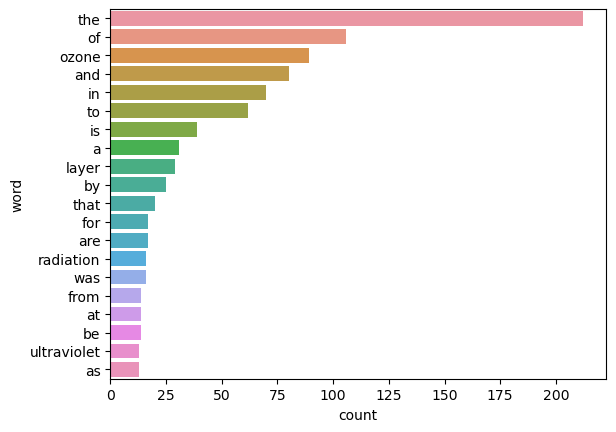

In [460]:
visualize(frequencies, 20)

## Remove "stop words"

In [461]:
def remove_stop_words(words, stop_words):
    filtered = []
    for word in words:
        if word not in stop_words:
            filtered.append(word)
    return filtered

In [462]:
stop_words = "the of and in to is a by that this for are was from at be as about with have it on this has been nm o s m an can because or its also were which these into out being all other most over"
stop_words = stop_words.split(" ")

In [463]:
filtered = remove_stop_words(collection_lower, stop_words)

In [464]:
filtered_frequencies = count_frequency(filtered)
filtered_frequencies

{'ozone': 89,
 'layer': 29,
 'radiation': 16,
 'ultraviolet': 13,
 'earth': 12,
 'stratosphere': 12,
 'atmosphere': 11,
 'climate': 11,
 'surface': 10,
 'uv': 10,
 'depletion': 10,
 'united': 8,
 'oxygen': 8,
 '10': 7,
 'cfcs': 7,
 'skin': 7,
 '2': 7,
 '5': 6,
 'stratospheric': 6,
 'light': 6,
 'air': 6,
 'latitudes': 6,
 'environmental': 6,
 'change': 6,
 'countries': 6,
 'doi': 6,
 'isbn': 6,
 'sun': 5,
 'high': 5,
 'parts': 5,
 'although': 5,
 '000': 5,
 'k': 5,
 'used': 5,
 'between': 5,
 'damage': 5,
 'nations': 5,
 'o2': 5,
 'd': 5,
 'circulation': 5,
 'northern': 5,
 'compounds': 5,
 'regulation': 5,
 'protocol': 5,
 'sciences': 5,
 'j': 5,
 'absorbs': 4,
 'concentration': 4,
 'less': 4,
 'than': 4,
 'million': 4,
 'while': 4,
 'above': 4,
 'wavelength': 4,
 'percent': 4,
 '200': 4,
 'near': 4,
 'atmospheric': 4,
 'increased': 4,
 'cancer': 4,
 'atomic': 4,
 'where': 4,
 'very': 4,
 'important': 4,
 'harmful': 4,
 'uv-b': 4,
 'cause': 4,
 'such': 4,
 'effective': 4,
 'production

## Most frequent words (filtered)

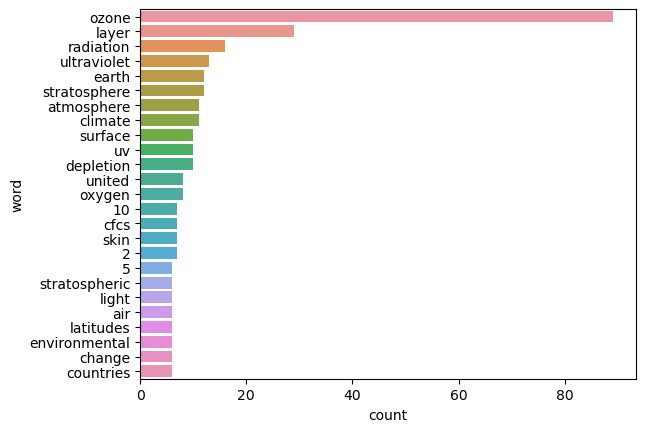

In [465]:
visualize(filtered_frequencies, 25)

# Vectorization of articles for two-word searches

## Bigram standard count

In [466]:
filtered_bigrams = []
for i in range(len(filtered) - 1):
    bigram = filtered[i] + " " + filtered[i + 1]
    filtered_bigrams.append(bigram)

In [467]:
bigram_frequencies = count_frequency(filtered_bigrams)

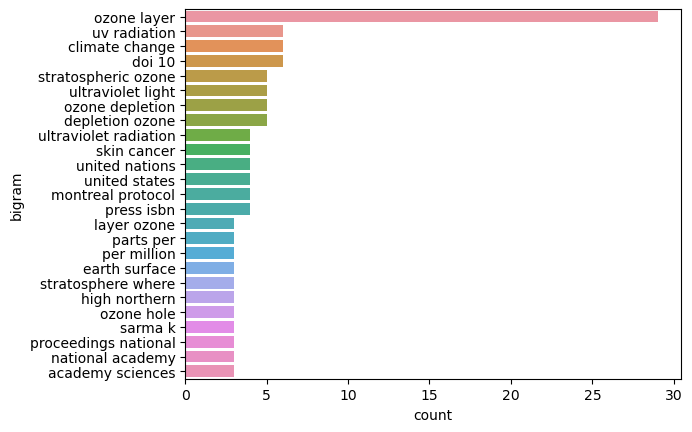

In [468]:
visualize(bigram_frequencies, 25, y_label="bigram")

## Bigrams frequencies by TF-IDF

In [469]:
tfidf = TfidfVectorizer(ngram_range=(2, 2))
transformed = tfidf.fit_transform([" ".join(filtered)])
feature_names = tfidf.get_feature_names_out()

df = pd.DataFrame(transformed.T.todense(), index=feature_names, columns=["TF-IDF"])

In [470]:
bigram_dict = df.to_dict()["TF-IDF"]
bigram_dict = dict(sorted(bigram_dict.items(), key=lambda x: x[1], reverse=True))

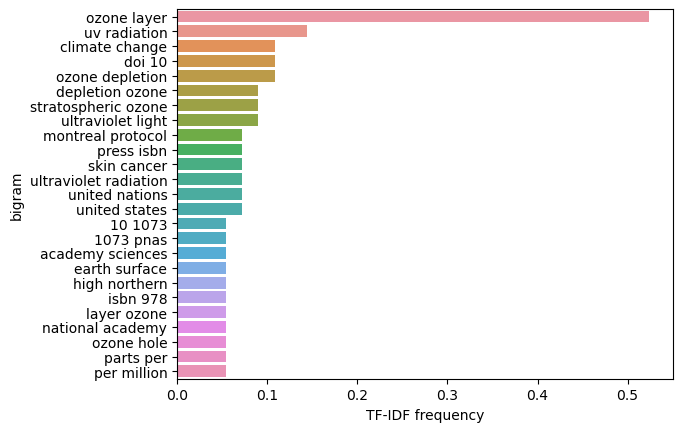

In [471]:
visualize(bigram_dict, 25, "TF-IDF frequency", "bigram")